<div style="text-align: center;"> 
    <span style="font-size: 40px; font-weight: bold">
        CSC17104 – PROGRAMING FOR DATA SCIENCE
    </span>
</div>

<div style="text-align: center;"> 
    <span style="font-size: 32px; font-weight: bold">
        FINAL PROJECT
    </span>
</div>

<div style="text-align: center;"> 
    <span style="font-size: 24px; font-weight: bold">
        <i>
            Data Exploration
        </i>
    </span>
</div>

<div style="text-align: right;">
    <span style="font-size: 14px">
        <i>
            Nov 22, 2025
        </i>
    </span>
</div>

| Name | ID |
| --- | --- |
| Lê Võ Nhật Minh | 22120210 |
| Nguyễn Hữu Nghĩa | 22120227 |
| Nguyễn Lê Tấn Phát | 22120262 |

---

<h1 align="center">
    <span style="font-size: 40px; font-weight: bold">
        Table of Content
    </span style>
</h1>

[**Preparation**](#o)

I. [**Overview**](#i)

1. [**Basic Information**](#i_1)

2. [**Data Integrity**](#i_2)

3. [**Column Inventory**](#i_3)

4. [**Data Types**](#i_4)

II. [**Numerical Columns Analysis**](#ii)

1. [**Distribution & Central Tendency**](#ii_1)

2. [**Range & Outliers**](#ii_2)

3. [**Data Quality**](#ii_3)

III. [**Categorical Columns Analysis**](#iii)

1. [**Overview of Categorical Data**](#iii_1)

2. [**Detailed Column Analysis**](#iii_2)

3. [**Key Observations & Insights**](#iii_3)

IV. [**Relationships & Correlations**](#iv)

1. [**Correlation Matrix for Numerical Variables**](#iv_1)

2. [**Numerical Features vs. Target Variable (`NObeyesdad`)**](#iv_2)

3. [**Categorical vs. Categorical Analysis**](#iv_3)

V. [**Initial Observation & Insights**](#v)

1. [**Key Observations**](#v_1)

2. [**Data Quality Issues Identified**](#v_2)

3. [**Necessary Preprocessing Steps**](#v_3)

4. [**Interesting Patterns for Research**](#v4)

5. [**Serious Data Quality Concerns**](#v_5)

6. [**Limitations Affecting Analysis**](#v_6)

---

<h1 id="o" style="font-weight: bold">Preparation</h1>

Import library

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math


Read data

In [2]:
FILE_PATH = r'..\..\data\raw\ObesityDataSet.csv'

try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print("Error: No file found!")
    exit()

<h1 id="i" style="font-weight: bold">I. Overview</h1>

<h2 id="i_1" style="font-weight: bold">1. Basic Information</h2>

In [3]:
num_rows, num_cols = df.shape
print(f"Number of row: {num_rows}")
print(f"Number of column: {num_cols}")

Number of row: 2111
Number of column: 17


In [4]:
file_size_bytes = os.path.getsize(FILE_PATH)
file_size_mb = file_size_bytes / (1024 * 1024)
print(f"File's size: {file_size_mb:.2f} MB")

File's size: 0.25 MB


In [5]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Each row corresponds to a single anonymous individual from Mexico, Peru, or Colombia, and contains their personal attributes - such as age, gender, height, weight - combined with lifestyle habits and physical condition indicators, along with the estimated obesity level assigned to that person.

<h2 id="i_2" style="font-weight: bold">2. Data Integrity</h2>

In [6]:
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate row: {duplicates_count}")

Number of duplicate row: 24


In [7]:
duplicate_df = df[df.duplicated()]
duplicate_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
98,Female,21.0,1.52,42.0,no,no,3.0,1.0,Frequently,no,1.0,no,0.0,0.0,Sometimes,Public_Transportation,Insufficient_Weight
106,Female,25.0,1.57,55.0,no,yes,2.0,1.0,Sometimes,no,2.0,no,2.0,0.0,Sometimes,Public_Transportation,Normal_Weight
174,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
179,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
184,Male,21.0,1.62,70.0,no,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,Sometimes,Public_Transportation,Overweight_Level_I
209,Female,22.0,1.69,65.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Normal_Weight
309,Female,16.0,1.66,58.0,no,no,2.0,1.0,Sometimes,no,1.0,no,0.0,1.0,no,Walking,Normal_Weight
460,Female,18.0,1.62,55.0,yes,yes,2.0,3.0,Frequently,no,1.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight
467,Male,22.0,1.74,75.0,yes,yes,3.0,3.0,Frequently,no,1.0,no,1.0,0.0,no,Automobile,Normal_Weight
496,Male,18.0,1.72,53.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,2.0,Sometimes,Public_Transportation,Insufficient_Weight


Because the main purpose of this dataset is to train a classification model, the duplicated rows do not provide any additional information and may introduce bias into the model. Therefore, we decided to remove these duplicated records, keeping only one instance of each.

In [8]:
print("Shape before:", df.shape)

df.drop_duplicates(inplace=True)

print("Shape after:", df.shape)

Shape before: (2111, 17)
Shape after: (2087, 17)


In [9]:
empty_rows = df.isnull().all(axis=1).sum()
print(f"Number of empty row: {empty_rows}")

Number of empty row: 0


<h2 id="i_3" style="font-weight: bold"> 3. Column Inventory</h2>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             2087 no

| **Feature** |**Description** |
| --- | --- |
| `Gender` | The user's gender |
| `Age` | The user's age |
| `Height` | The user's height |
| `Weight` | The user's weight |
| `family_history_with_overweight` | Indicates whether the user has a family history of being overweight |
| `FAVC` | Indicates whether the user frequently consumes high-caloric food |
| `FCVC` | Indicates whether the user regularly consumes vegetables |
| `NCP` | The number of main meals the user consumes per day |
| `CAEC` | The user's eating behavior between meals (snacking habits) |
| `SMOKE` | Indicates whether the user smokes |
| `CH20` | The amount of water the user consumes daily |
| `SCC` | Indicates whether the user monitors their daily caloric intake |
| `FAF` | The frequency of the user's physical activity |
| `TUE` | The amount of time the user spends using technological devices daily |
| `CALC` | The frequency of the user's alcohol consumption |
| `MTRANS` | The primary mode of transportation the user uses |
| `NObesity` | Obesity level classification based on BMI: Underweight < 18.5; Normal = 18.5–24.9; Overweight = 25.0–29.9; Obesity I = 30.0–34.9; Obesity II = 35.0–39.9; Obesity III ≥ 40.0. |


In [11]:
df.describe(include='all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2087,2087.000000,2087.000000,2087.000000,2087,2087,2087.000000,2087.000000,2087,2087,2087.000000,2087,2087.000000,2087.000000,2087,2087,2087
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1052,NaN,NaN,NaN,1722,1844,NaN,NaN,1761,2043,NaN,1991,NaN,NaN,1380,1558,351
mean,NaN,24.353090,1.702674,86.858730,NaN,NaN,2.421466,2.701179,NaN,NaN,2.004749,NaN,1.012812,0.663035,NaN,NaN,NaN
std,NaN,6.368801,0.093186,26.190847,NaN,NaN,0.534737,0.764614,NaN,NaN,0.608284,NaN,0.853475,0.608153,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.915937,1.630178,66.000000,NaN,NaN,2.000000,2.697467,NaN,NaN,1.590922,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.847618,1.701584,83.101100,NaN,NaN,2.396265,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.630866,NaN,NaN,NaN
75%,NaN,26.000000,1.769491,108.015907,NaN,NaN,3.000000,3.000000,NaN,NaN,2.466193,NaN,1.678102,1.000000,NaN,NaN,NaN


From the table above, we can observe that several categorical columns are highly imbalanced. For example:

* family_history_with_overweight, FAVC, SMOKE, SCC: Each of these columns has one dominant category with a very high frequency, indicating the dataset is skewed toward a specific behavior (e.g., most participants report not smoking or having a family history of overweight).

* MTRANS and CALC also show strong dominance of one value, meaning only a small portion of the dataset represents other categories.

Such imbalance is important because:

* The model may become biased towards the majority classes.

* Minority categories may be underrepresented, making classification harder for those groups.

* Some features may not contribute useful variance if most values are identical or concentrated in one category.

Therefore, these imbalanced columns should be examined carefully during preprocessing. We may need techniques such as resampling, class weighting, or feature transformation to reduce bias before training the model.

**Relevance of Columns for Analysis**

All columns in the dataset are directly related to factors influencing obesity, such as eating habits, physical activity, lifestyle, and basic physical measurements. Therefore, all attributes are relevant to the classification task and can serve as predictive features for the model.

**Should Any Columns Be Dropped?**

At this stage, no column needs to be removed. The dataset does not contain redundant identifiers, constant values, or features unrelated to obesity prediction. Each column contributes meaningful information, thus they should all be retained for further analysis and model training.

<h2 id="i_4" style="font-weight: bold">4. Data Types</h2>

In [12]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

**Age:**

* Age is naturally an integer value (people’s ages are counted in whole years).

* Converting from float to int avoids unnecessary decimal points and makes the data more interpretable.

**Ordinal numeric features (FCVC, NCP, CH2O, FAF, TUE):**

* These columns represent discrete categories or frequency levels (e.g., 1 = low, 2 = medium, 3 = high).

* Using int instead of float better reflects their ordinal nature.

* Makes the data more readable and compatible with algorithms that expect discrete numeric input.

**Clarity and consistency:**

* Removing decimals in discrete/ordinal columns prevents misleading interpretation.

* Ensures all categorical-like numeric columns are clearly distinguished from continuous numeric columns (Height, Weight).

In [13]:
cols_to_int = ["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
df[cols_to_int] = df[cols_to_int].astype(int)

In [14]:
df.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                                int64
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                                int64
SCC                                object
FAF                                 int64
TUE                                 int64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

---

<h1 id="ii" style="font-weight: bold">II. Numerical Columns Analysis</h1>

In [15]:
numerical_df = df.select_dtypes(include='number')
numerical_df.dtypes

Age         int64
Height    float64
Weight    float64
FCVC        int64
NCP         int64
CH2O        int64
FAF         int64
TUE         int64
dtype: object

<h2 id="ii_1" style="font-weight: bold">1. Distribution & Central Tendency</h2>

<h3 style="font-weight: bold">Height Column</h3>

For each type of value, we will use appropriate method to visualize corresponding datatype. For example, columns with continuous datatype as `float64` can be visualized using histogram.

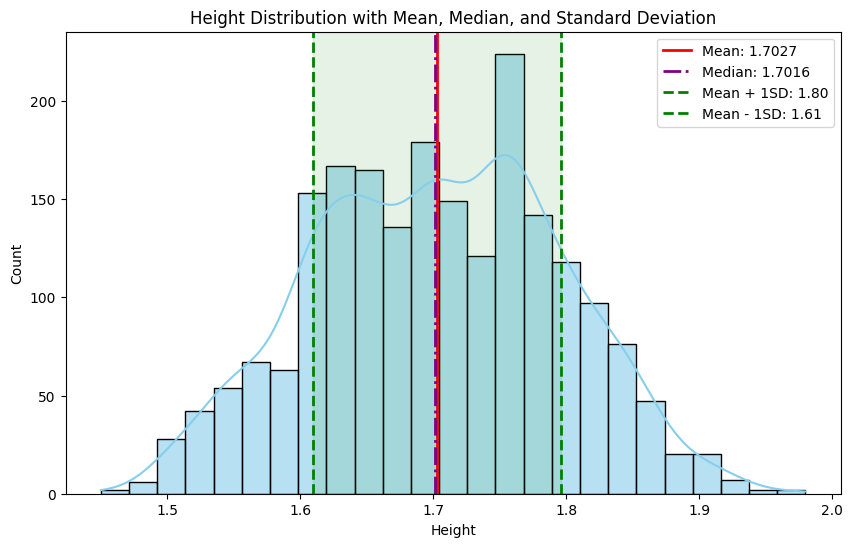

In [16]:
mean_height = df['Height'].mean()
median_height = df['Height'].median()
std_height = df['Height'].std()

plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='Height', kde=True, color='skyblue', alpha=0.6)

plt.axvline(mean_height, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_height:.4f}')

plt.axvline(median_height, color='purple', linestyle='-.', linewidth=2, label=f'Median: {median_height:.4f}')

plt.axvline(mean_height + std_height, color='green', linestyle='--', linewidth=2, label=f'Mean + 1SD: {(mean_height + std_height):.2f}')
plt.axvline(mean_height - std_height, color='green', linestyle='--', linewidth=2, label=f'Mean - 1SD: {(mean_height - std_height):.2f}')

plt.axvspan(mean_height - std_height, mean_height + std_height, color='green', alpha=0.1)

plt.title('Height Distribution with Mean, Median, and Standard Deviation')
plt.legend()
plt.show()

In [17]:
print("Mean of Height:", numerical_df['Height'].mean())
print("Median of Height:", numerical_df['Height'].median())
print("Standard Deviation of Height:", numerical_df['Height'].std())

Mean of Height: 1.7026741221849544
Median of Height: 1.701584
Standard Deviation of Height: 0.09318594231105748


Based on the histogram of the height distribution and the KDE-smoothed density plot, we can draw several observations:
- Overall, the height distribution exhibits a pattern similar to a normal distribution. The data is concentrated around the center and gradually decreases toward the two tails.
- However, upon closer inspection, we can see that this is not a perfectly ideal bell shape (an ideal bell curve would have only one single peak):
    - The curve shows a slightly “wavy” peak, with around three small sub-peaks within the range of 1.6m to 1.75m.
    - This indicates that the height values do not cluster around just one single central average but fluctuate slightly around the center. A possible explanation is that the dataset includes both men and women, and male and female height distributions often have different peaks.
- The overall shape of the plot is fairly symmetric, with no strong signs of left-skewness or right-skewness. The two tails are narrow and relatively symmetric to each other.

Based on the measures of central tendency, we can draw the following observations:
* The mean and median are almost identical (the difference is only about 0.001). This further supports the conclusion that the data is not skewed.
* Regarding the dispersion of the data, applying the 68-95-99.7 rule:
  * 68% of individuals in the sample have heights within the range: (1.70 $\pm$ 0.09), which corresponds to 1.61m to 1.79m.
  * 95% of individuals fall within: $(1.70 \pm (2 \times 0.09))$, corresponding to 1.51m to 1.89m.
  * Those who are below 1.51m or above 1.89m are considered quite rare.

<h3 style="font-weight: bold">Weight Column</h3>

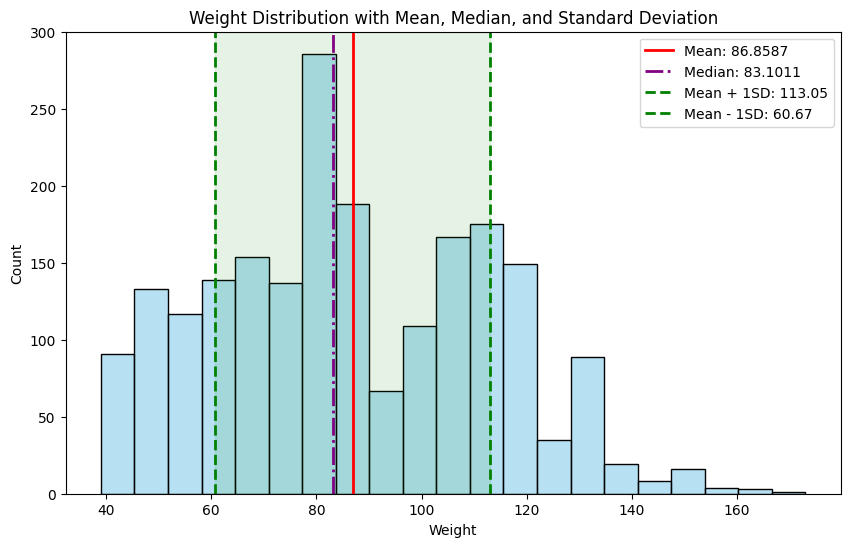

In [18]:
mean_weight = numerical_df['Weight'].mean()
median_weight = numerical_df['Weight'].median()
std_weight = numerical_df['Weight'].std()

plt.figure(figsize=(10, 6))

sns.histplot(data=numerical_df, x='Weight', color='skyblue', alpha=0.6)


plt.axvline(mean_weight, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_weight:.4f}')

plt.axvline(median_weight, color='purple', linestyle='-.', linewidth=2, label=f'Median: {median_weight:.4f}')


plt.axvline(mean_weight + std_weight, color='green', linestyle='--', linewidth=2, label=f'Mean + 1SD: {(mean_weight + std_weight):.2f}')


plt.axvline(mean_weight - std_weight, color='green', linestyle='--', linewidth=2, label=f'Mean - 1SD: {(mean_weight - std_weight):.2f}')


plt.axvspan(mean_weight - std_weight, mean_weight + std_weight, color='green', alpha=0.1)

plt.title('Weight Distribution with Mean, Median, and Standard Deviation')
plt.legend()
plt.show()

In [19]:
print("Mean of Weight:", numerical_df['Weight'].mean())
print("Median of Weight:", numerical_df['Weight'].median())
print("Standard Deviation of Weight:", numerical_df['Weight'].std())

Mean of Weight: 86.85872961427887
Median of Weight: 83.1011
Standard Deviation of Weight: 26.190847077225722


Based on the histogram of the wweight distribution, we can draw several observations:
* Overall, the weight distribution is multimodal with three peaks:

  * Peak 1: The lightweight group (approximately 50 to 55 kg).
  * Peak 2: The medium-weight group (around 80 kg).
  * Peak 3: The heavyweight group (around 110 kg).
* The histogram is noticeably right-skewed. The tail extends toward higher values, roughly from 120 to 170 kg.
* There are very few values on the left side of the distribution. This aligns with reality, as human body weight tends to have a relatively hard lower bound (rarely below 40 kg), whereas the upper limit is more flexible (depending on height, accumulated body fat, etc.).

Based on the measures of central tendency, we can draw several observations:
* The mean weight is about 3.75 kg higher than the median, which further supports the conclusion that this is a right-skewed distribution.
* The large standard deviation (approximately 26.19 kg) indicates that the individuals’ weights vary widely around the mean.

<h3 style="font-weight: bold">Age Column</h3>

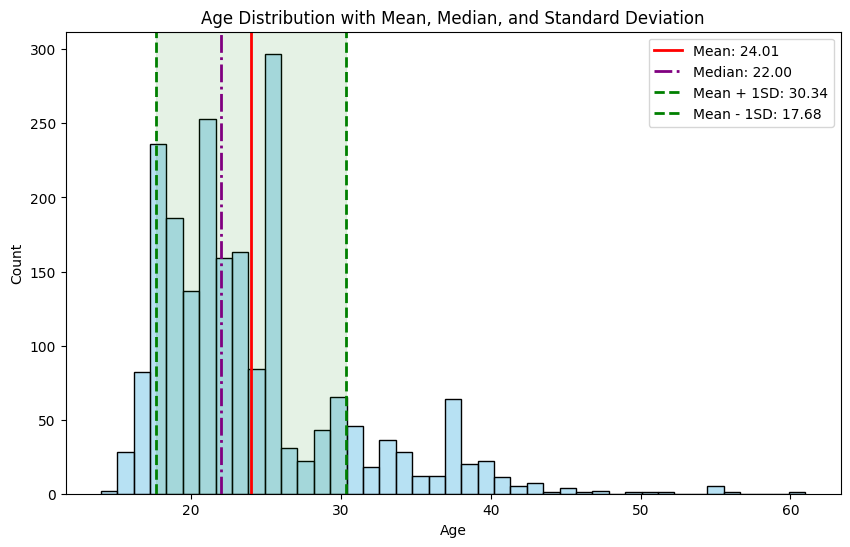

In [20]:
mean_age = numerical_df['Age'].mean()
median_age = numerical_df['Age'].median()
std_age = numerical_df['Age'].std()

plt.figure(figsize=(10, 6))

sns.histplot(data=numerical_df, x='Age', color='skyblue', alpha=0.6)

plt.axvline(mean_age, color='red', linestyle='-', linewidth=2, label=f'Mean: {mean_age:.2f}')

plt.axvline(median_age, color='purple', linestyle='-.', linewidth=2, label=f'Median: {median_age:.2f}')

plt.axvline(mean_age + std_age, color='green', linestyle='--', linewidth=2, label=f'Mean + 1SD: {(mean_age + std_age):.2f}')

plt.axvline(mean_age - std_age, color='green', linestyle='--', linewidth=2, label=f'Mean - 1SD: {(mean_age - std_age):.2f}')

plt.axvspan(mean_age - std_age, mean_age + std_age, color='green', alpha=0.1)

plt.title('Age Distribution with Mean, Median, and Standard Deviation')
plt.xlabel('Age')
plt.legend()
plt.show()

Based on the age distribution, we can draw several observations:

* Most of the survey participants are young people. The distribution has three peaks between ages 18 and 26.
* This is a right-skewed distribution, with the tail extending up to 60 years old.

Based on the measures of central tendency, we can conclude:

* The mean is higher than the median (by about 2 years), reinforcing the right-skewed distribution described above.
* Most values fall within the 18–30 age range (Mean ± SD).


<h3 style="font-weight: bold">Lifestyle & Habits Columns</h3>

In [21]:
lifestyle_habits_col = {
    "FCVC": {
        "meaning": [
            "Rarely",
            "Sometimes",
            "Always"
        ],
        "legend": "Frequency of consumption \nof vegetables"
    },
    "NCP": {
        "meaning": [
            "1 main meal",
            "2 main meals",
            "3 main meals",
            "More than 3 meals"
        ],
        "legend": "Number of main meals"
    },
    "CH2O": {
        "meaning": [
            "Low",
            "Moderate",
            "High"
        ],
        "legend": "Consumption of water daily"
    },
    "FAF": {
        "meaning": [
            "None",
            "Low",
            "Moderate",
            "High"
        ],
        "legend": "Physical activity frequency"
    },
    "TUE": {
        "meaning": [
            "Low",
            "Moderate",
            "High"
        ],
        "legend": "Time using technology devices"
    }
}

for c in lifestyle_habits_col:
    print("Number of unique values in", c, ":", numerical_df[c].nunique())

Number of unique values in FCVC : 3
Number of unique values in NCP : 4
Number of unique values in CH2O : 3
Number of unique values in FAF : 4
Number of unique values in TUE : 3


We observe that the columns related to lifestyle and habits contain discrete values within a defined range; therefore, we will use an appropriate visualization method. In this case, it will be a pie chart.

In [22]:
numerical_df[lifestyle_habits_col.keys()].describe()

,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,2.213225,2.537135,1.705798,0.734068,0.383325
std,0.601259,0.821240,0.591308,0.835860,0.583136
min,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,3.000000,2.000000,1.000000,0.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000
max,3.000000,4.000000,3.000000,3.000000,2.000000


* To make the chart easier to understand during visualization, we will temporarily infer the quantitative meaning of each column’s values based on the descriptions provided by the author.
* However, these inferred meanings are only provisional assumptions intended to give more context to the visualization process. We should avoid being overly biased by these interpretations.

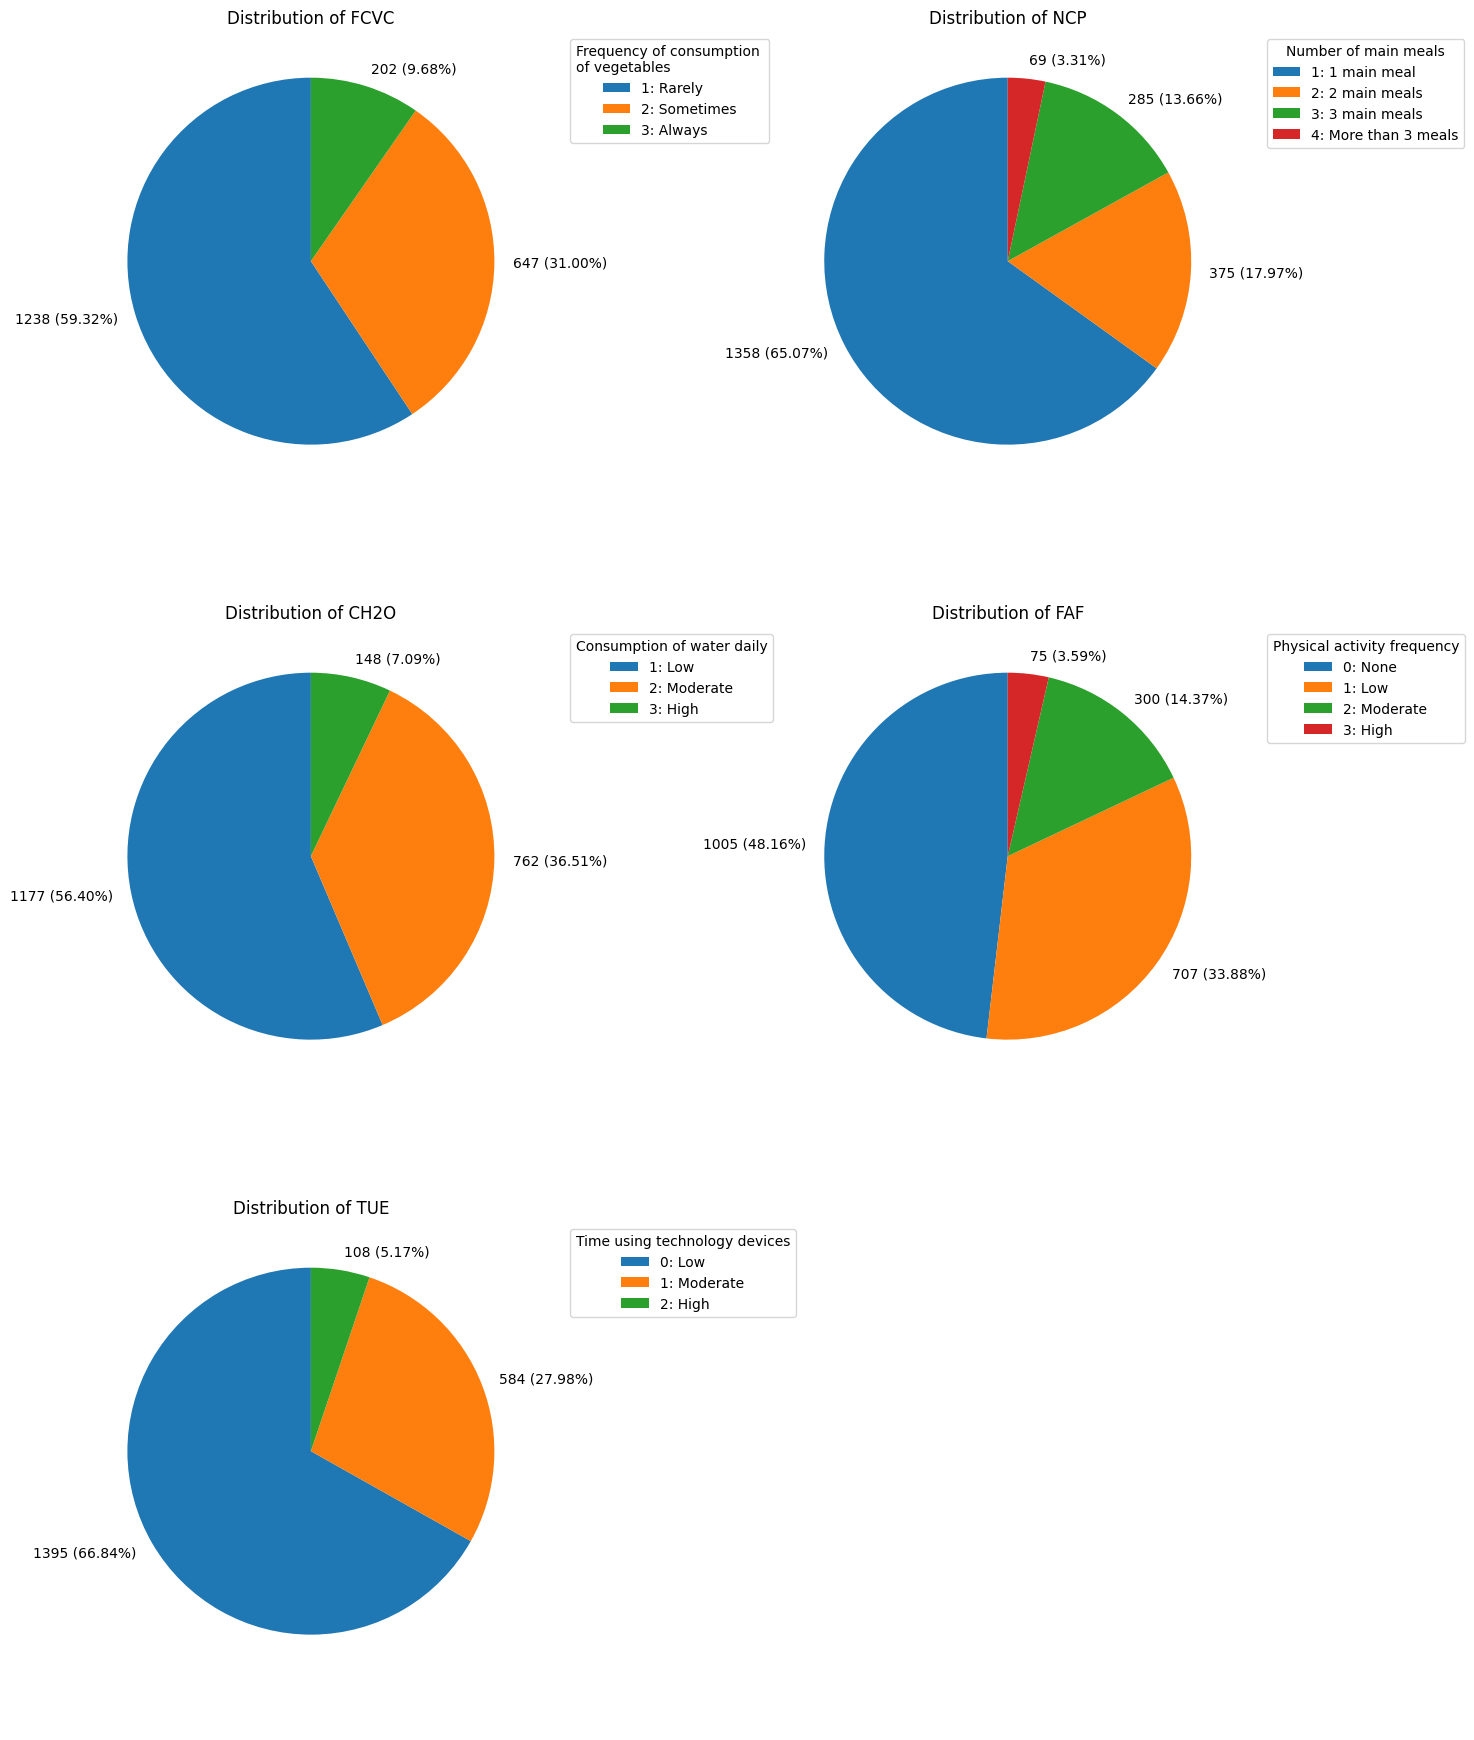

In [23]:
def analyze_numerical_columns_grid(lifestyle_habits_col):
    n_cols = 2                          
    n_charts = len(lifestyle_habits_col)  
    n_rows = math.ceil(n_charts / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))
    axes = axes.flatten()               

    for ax, (col_name, info) in zip(axes, lifestyle_habits_col.items()):
        counts = numerical_df[col_name].value_counts()
        sum_counts = counts.sum()

        ax.pie(
            counts,
            labels=[f"{val} ({(val / sum_counts * 100):.2f}%)" for _, val in counts.items()],
            startangle=90
        )

        ax.set_title(f"Distribution of {col_name}")

        ax.legend(
            [f"{idx}: {meaning}" for (idx, _), meaning in zip(counts.sort_index().items(), info["meaning"])],
            title=info["legend"],
            bbox_to_anchor=(1.05, 1),
            loc="upper left"
        )

    for ax in axes[n_charts:]:
        ax.axis("off")

    plt.tight_layout()
    plt.show()


analyze_numerical_columns_grid(lifestyle_habits_col)




Based on the distribution chart of lifestyle habits, the following observations can be made:
* FCVC (Frequency of Consumption of Vegetables):
    * A significant 59.32% (blue) of individuals consume vegetables at the lowest level (1 - Rarely).
    * Green vegetables are a crucial source of fiber for weight control. The fact that the majority of survey participants rarely (or never) eat vegetables is a strong indicator explaining the prevalence of overweight/obesity in this dataset.

* NCP (Number of Main Meals):
    * 65.07% (blue) consume only 1 main meal per day.
    * This may seem counterintuitive at first (why does eating less lead to obesity?), but nutritionally, consuming too few main meals often leads to two consequences:
        1.  The body enters "survival mode," storing energy as fat.
        2.  Individuals may consume snacks containing high amounts of empty calories instead of proper meals.

* CH2O (Consumption of Water Daily):
    * 56.40% (blue) have a Low water consumption level (1).
    * Water plays a key role in metabolism. Low water intake slows down the fat-burning process. This represents another common unhealthy habit.

* FAF (Physical Activity Frequency):
    * Nearly half of the participants (48.16% - blue) have an activity level of 0 (No exercise at all). If we add the "Low" group (33.88%), then over 80% of individuals in this dataset are physically inactive.
    * A sedentary lifestyle is a defining characteristic of this dataset. Consuming energy without expending it (FAF = 0) is the perfect formula for weight gain.

* TUE (Time Using Technology Devices):
    * 66.84% (blue) use devices at level 0 (Low).
    * This figure is somewhat contrary to common assumptions (typically, it is assumed that obesity is associated with high computer/phone usage).

<h2 id="ii_2" style="font-weight: bold">2. Range & Outliers</h2>

In [24]:
numerical_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.009104,1.702674,86.858730,2.213225,2.537135,1.705798,0.734068,0.383325
std,6.333297,0.093186,26.190847,0.601259,0.821240,0.591308,0.835860,0.583136
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.630178,66.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,22.000000,1.701584,83.101100,2.000000,3.000000,2.000000,1.000000,0.000000
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.000000,1.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


After examining the minimum and maximum values of the columns, we can draw several conclusions:
* We can see that the minimum and maximum values of most columns appear generally normal.
* The maximum values of the Height and Weight columns seem slightly high compared to typical standards (a person 1.98m tall and weighing 173kg). However, searching on the Internet shows that such cases do exist. Therefore, the maximum values for the Height and Weight columns are not unusual.
* For the columns related to “Lifestyles & habits,” as previously examined, the minimum and maximum values also do not show any abnormalities.

When examining the distribution of the values, we can draw several conclusions for the visualization process as follows:
* Based on the assessment of the columns’ distributions, we observe that most of them do not follow a normal distribution. Therefore, we will not use the Z-score.
* Instead, we will use boxplots to visualize the results. Boxplots use the IQR to identify outliers, and since the IQR does not assume any specific distribution, it is appropriate in this situation.
* Because the columns related to “Lifestyles & Habits” are ordinal data with fixed value ranges (we previously examined their distributions and found no abnormalities), we will also not create boxplots to investigate outliers for these columns.

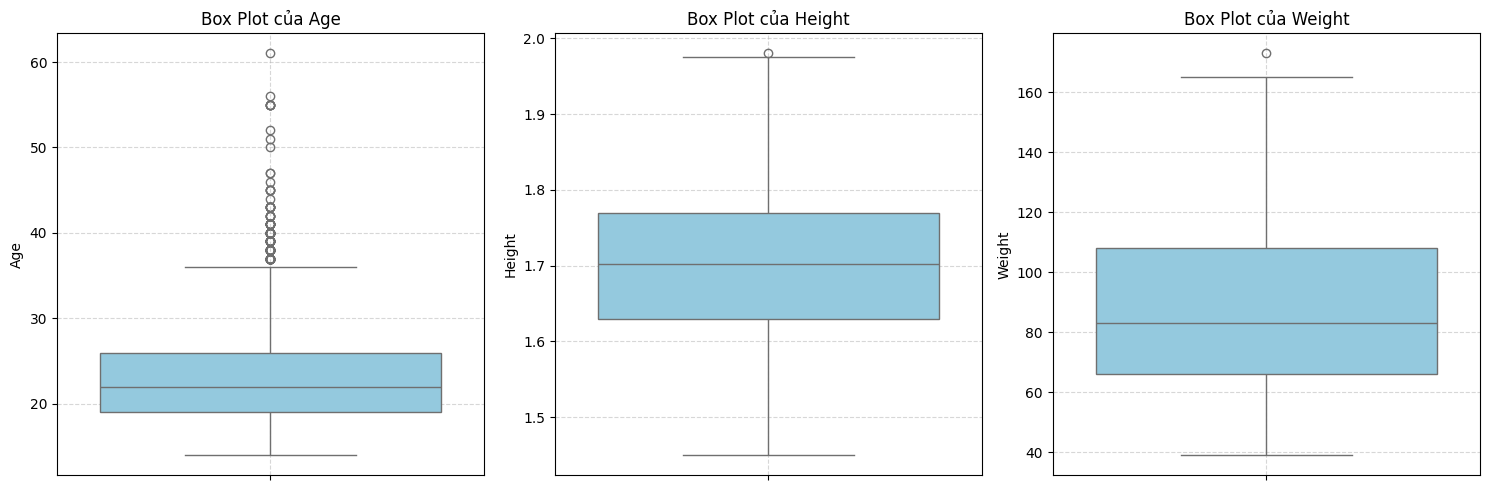

In [25]:
cols_to_detect_outliers = list(numerical_df.columns)[:3]
n_cols = 3
n_rows = math.ceil(len(cols_to_detect_outliers) / n_cols)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(cols_to_detect_outliers):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(y=numerical_df[col], color='skyblue') 
    plt.title(f'Box Plot của {col}', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Based on the box plots above, we can see that the outliers are indeed extremely large values, rather than errors in the data entry process.

<h2 id="ii_3" style="font-weight: bold">3. Data Quality</h2>

In [26]:
numerical_df.isna().sum()

Age       0
Height    0
Weight    0
FCVC      0
NCP       0
CH2O      0
FAF       0
TUE       0
dtype: int64

There is no column that has missing values

In [27]:
numerical_df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.009104,1.702674,86.858730,2.213225,2.537135,1.705798,0.734068,0.383325
std,6.333297,0.093186,26.190847,0.601259,0.821240,0.591308,0.835860,0.583136
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.000000,1.630178,66.000000,2.000000,2.000000,1.000000,0.000000,0.000000
50%,22.000000,1.701584,83.101100,2.000000,3.000000,2.000000,1.000000,0.000000
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.000000,1.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


There is also no impossible value and placeholder value.

---

<h1 id="iii" style="font-weight: bold">III. Categorical Columns Analysis</h1>

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify categorical columns (object type)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Categorical Columns identified ({len(cat_cols)}):")
print(cat_cols)

Categorical Columns identified (9):
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


<h2 id="iii_1" style="font-weight: bold">1. Overview of Categorical Data</h2>

In [29]:
cat_summary = pd.DataFrame({
    'Column': cat_cols,
    'Unique Values': [df[col].nunique() for col in cat_cols],
    'Missing Values': [df[col].isnull().sum() for col in cat_cols],
    'Missing Percentage': [(df[col].isnull().sum() / len(df)) * 100 for col in cat_cols],
    'Most Frequent': [df[col].mode()[0] for col in cat_cols]
})

display(cat_summary)

,Column,Unique Values,Missing Values,Missing Percentage,Most Frequent
0,Gender,2,0,0.0,Male
1,family_history_with_overweight,2,0,0.0,yes
2,FAVC,2,0,0.0,yes
3,CAEC,4,0,0.0,Sometimes
4,SMOKE,2,0,0.0,no
5,SCC,2,0,0.0,no
6,CALC,4,0,0.0,Sometimes
7,MTRANS,5,0,0.0,Public_Transportation
8,NObeyesdad,7,0,0.0,Obesity_Type_I


<h2 id="iii_2" style="font-weight: bold">2. Detailed Column Analysis</h2>

--- Analysis for: Gender ---

Unique Values: 2
Top 5 Frequent Values:
Gender
Male      1052
Female    1035
Name: count, dtype: int64

Dominant Category: 'Male' (50.41%)
>> Consistency Check: No obvious capitalization inconsistencies found.


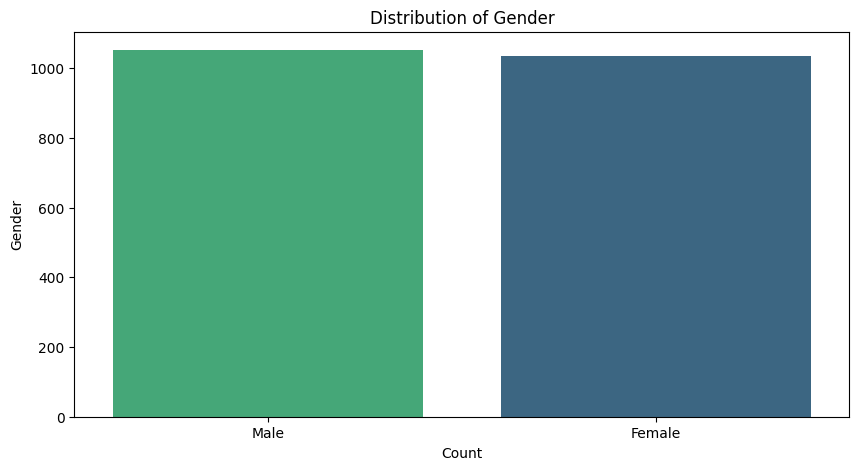



--- Analysis for: family_history_with_overweight ---

Unique Values: 2
Top 5 Frequent Values:
family_history_with_overweight
yes    1722
no      365
Name: count, dtype: int64

Dominant Category: 'yes' (82.51%)
>> WARNING: This column is highly imbalanced.
>> Consistency Check: No obvious capitalization inconsistencies found.


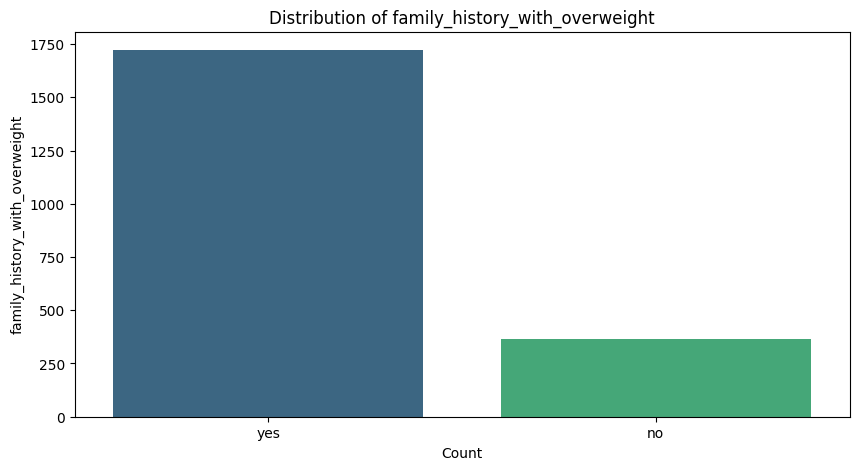



--- Analysis for: FAVC ---

Unique Values: 2
Top 5 Frequent Values:
FAVC
yes    1844
no      243
Name: count, dtype: int64

Dominant Category: 'yes' (88.36%)
>> WARNING: This column is highly imbalanced.
>> Consistency Check: No obvious capitalization inconsistencies found.


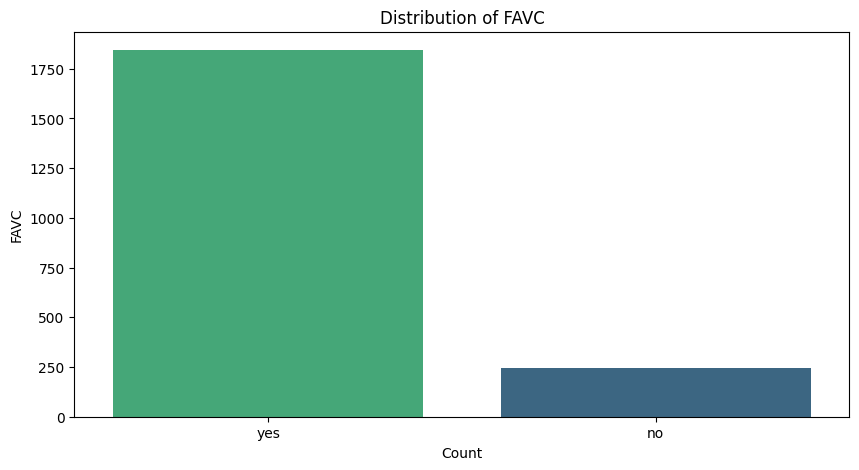



--- Analysis for: CAEC ---

Unique Values: 4
Top 5 Frequent Values:
CAEC
Sometimes     1761
Frequently     236
Always          53
no              37
Name: count, dtype: int64

Dominant Category: 'Sometimes' (84.38%)
>> WARNING: This column is highly imbalanced.
>> Consistency Check: No obvious capitalization inconsistencies found.


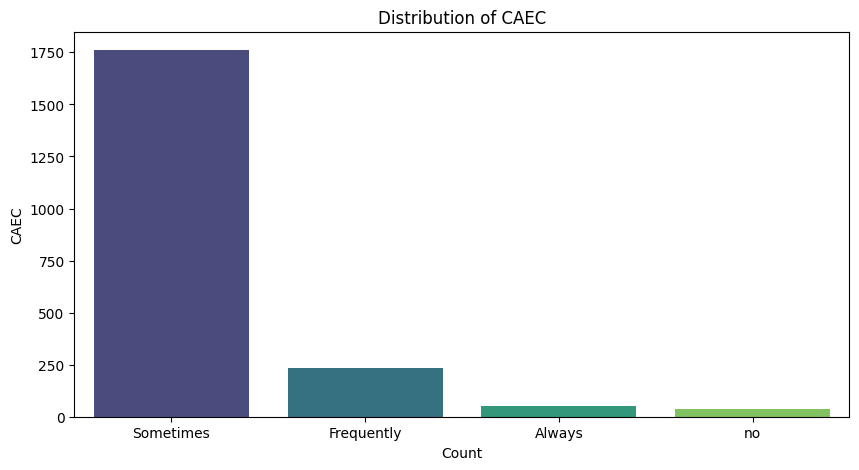



--- Analysis for: SMOKE ---

Unique Values: 2
Top 5 Frequent Values:
SMOKE
no     2043
yes      44
Name: count, dtype: int64

Dominant Category: 'no' (97.89%)
>> WARNING: This column is highly imbalanced.
>> Consistency Check: No obvious capitalization inconsistencies found.


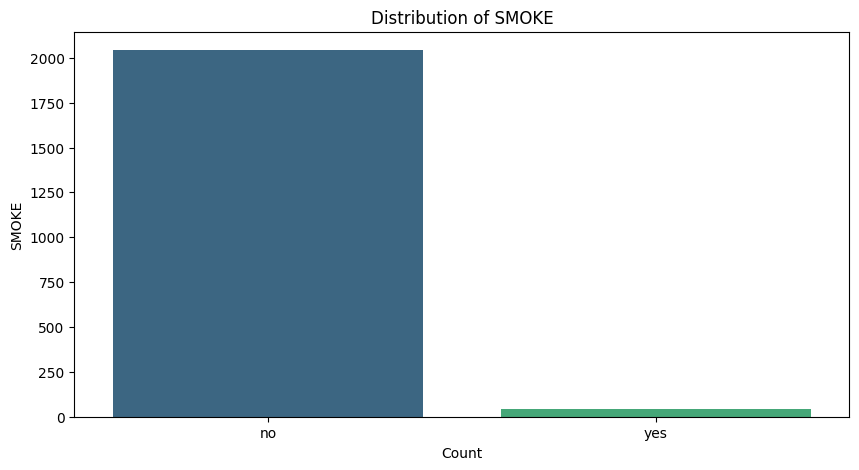



--- Analysis for: SCC ---

Unique Values: 2
Top 5 Frequent Values:
SCC
no     1991
yes      96
Name: count, dtype: int64

Dominant Category: 'no' (95.40%)
>> WARNING: This column is highly imbalanced.
>> Consistency Check: No obvious capitalization inconsistencies found.


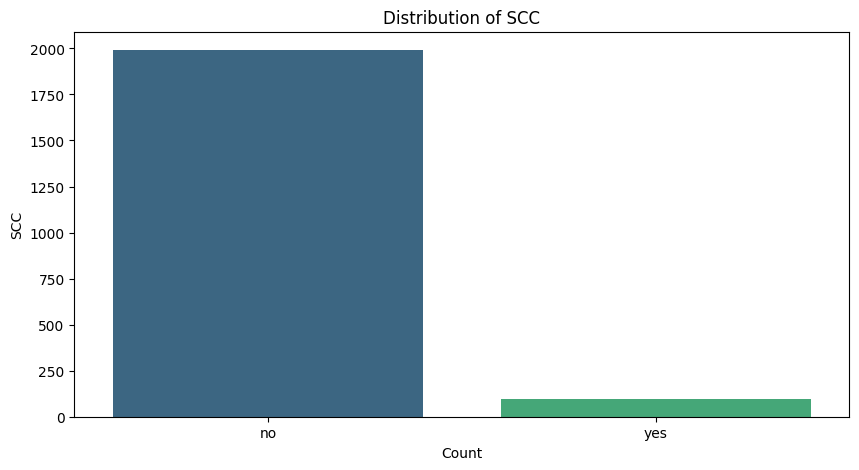



--- Analysis for: CALC ---

Unique Values: 4
Top 5 Frequent Values:
CALC
Sometimes     1380
no             636
Frequently      70
Always           1
Name: count, dtype: int64

Dominant Category: 'Sometimes' (66.12%)
>> Consistency Check: No obvious capitalization inconsistencies found.


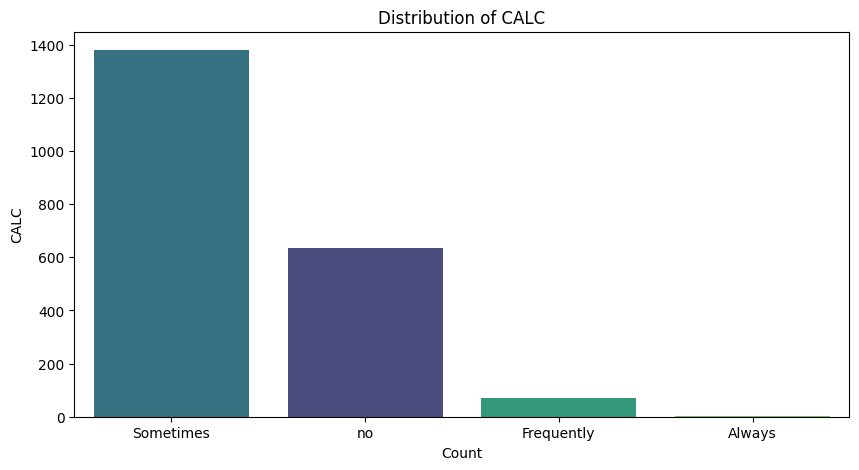



--- Analysis for: MTRANS ---

Unique Values: 5
Top 5 Frequent Values:
MTRANS
Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Dominant Category: 'Public_Transportation' (74.65%)
>> Consistency Check: No obvious capitalization inconsistencies found.


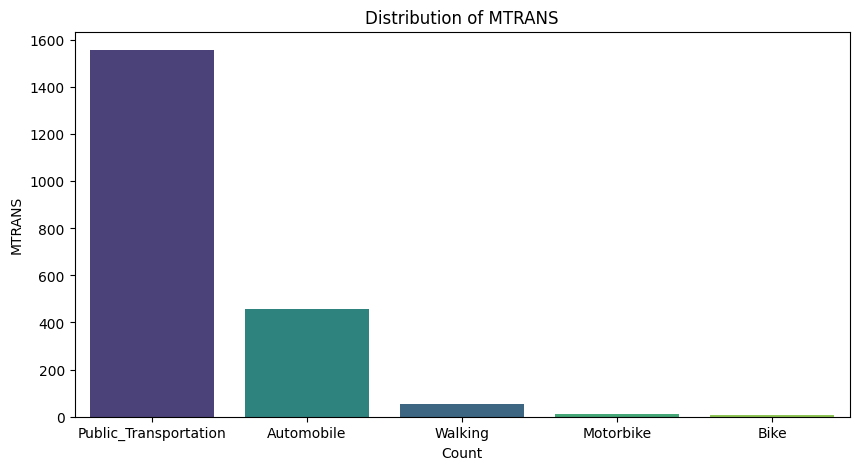



--- Analysis for: NObeyesdad ---

Unique Values: 7
Top 5 Frequent Values:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Name: count, dtype: int64

Dominant Category: 'Obesity_Type_I' (16.82%)
>> Consistency Check: No obvious capitalization inconsistencies found.


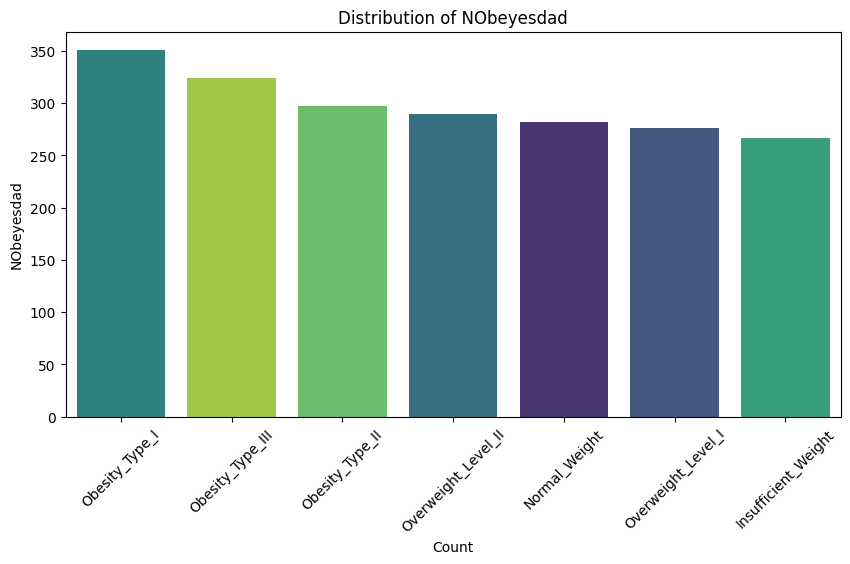

In [30]:
def analyze_categorical_column(df, col_name):
    print(f"--- Analysis for: {col_name} ---")
    
    # 1. Value Counts & Frequency
    val_counts = df[col_name].value_counts()
    print(f"\nUnique Values: {df[col_name].nunique()}")
    print("Top 5 Frequent Values:")
    print(val_counts.head(5))
    
    # Check for imbalance
    top_freq = val_counts.iloc[0]
    total = len(df)
    print(f"\nDominant Category: '{val_counts.index[0]}' ({(top_freq/total)*100:.2f}%)")
    if (top_freq/total) > 0.8: # Threshold for high imbalance
        print(">> WARNING: This column is highly imbalanced.")
        
    # 2. Check for Inconsistencies (Data Quality)
    # Check if there are similar strings with different casing (e.g., 'Male', 'male')
    unique_vals = df[col_name].dropna().unique()
    lower_vals = [str(x).lower() for x in unique_vals]
    if len(set(lower_vals)) != len(unique_vals):
        print(">> WARNING: Potential inconsistent capitalization detected (e.g., 'Male' vs 'male').")
        print(f"Values found: {unique_vals}")
    else:
        print(">> Consistency Check: No obvious capitalization inconsistencies found.")

    # 3. Visualization
    plt.figure(figsize=(10, 5))
    
    # Choose chart type based on cardinality
    if len(val_counts) > 10:
        sns.countplot(y=df[col_name], order=val_counts.index, hue=df[col_name], palette='viridis', legend=False)
    else:
        sns.countplot(x=df[col_name], order=val_counts.index, hue=df[col_name], palette='viridis', legend=False)
        
    plt.title(f'Distribution of {col_name}')
    plt.xlabel('Count')
    plt.ylabel(col_name)
    plt.xticks(rotation=45 if len(val_counts) > 5 and len(val_counts) <= 10 else 0)
    plt.show()
    print("\n" + "="*50 + "\n")

# Run the analysis for each column
for col in cat_cols:
    analyze_categorical_column(df, col)

<h2 id="iii_3" style="font-weight: bold">3. Key Observations & Insights</h2>

Based on the statistical summary and visualizations above, we have derived the following insights regarding the categorical features:

1. Data Quality Assessment
* **Completeness:** There are **no missing values** in any of the categorical columns.
* **Consistency:** The text data is clean. There are no capitalization inconsistencies (e.g., "Male" vs. "male") or obvious typos across all categorical features.
* **Unique Values:** The cardinality (number of unique values) is generally low, ranging from 2 (binary) to 7 (target variable), which simplifies the encoding process.

2. Distribution & Imbalance
We observed significant imbalance in several lifestyle-related features:
* **Extreme Imbalance (>95%):**
    * **`SMOKE`:** 97.9% of participants are non-smokers. This lack of variance suggests that smoking status might have limited predictive power for this specific dataset.
    * **`SCC` (Calories Monitoring):** 95.4% of participants do not monitor their daily calories.
* **High Imbalance (>80%):**
    * **`FAVC`:** 88.4% of individuals frequently consume high-caloric food.
    * **`CAEC`:** 84.4% eat food between meals "Sometimes", overshadowing other frequencies.
    * **`family_history_with_overweight`:** 82.5% have a family history of overweight, which is a strong indicator of the population sampled.

3. Rare Labels (Potential Issues)
Some columns contain categories with very few observations, which may cause issues during model training (e.g., if a category appears in the train set but not the test set):
* **`CALC` (Alcohol):** The category "Always" has only **1 observation**. This is a statistical anomaly and should likely be merged with "Frequently" or "Sometimes" during preprocessing.
* **`MTRANS` (Transportation):** "Bike" (7) and "Motorbike" (11) are very rare compared to "Public_Transportation" (1558). It might be beneficial to group these into a generic "Private_Bike_Motor" category.

4. Target Variable Analysis (`NObeyesdad`)
* Unlike many medical datasets, the target variable is **remarkably well-balanced**.
* All 7 classes (from *Insufficient_Weight* to *Obesity_Type_III*) have a sufficient number of samples (ranging roughly between 260 and 350).
* **Implication:** We likely do **not** need to apply complex resampling techniques (like SMOTE or Undersampling) for the target variable.

5. Conclusion for Preprocessing

Moving forward to the Data Preparation phase, we should:
- **Merge Rare Labels:** Specifically for `CALC` (handle the single "Always" value) and potentially `MTRANS`.
- **Encoding:** Apply One-Hot Encoding for nominal variables (`Gender`, `MTRANS`) and Label/Ordinal Encoding for ordinal variables (`CAEC`, `CALC`).
- **Feature Selection:** Keep an eye on `SMOKE` and `SCC`; if feature importance analysis later shows they are irrelevant due to low variance, they might be candidates for removal.

---

<h1 id="iv" style="font-weight: bold">IV. Relationships & Correlations</h1>

<h2 id="iv_1" style="font-weight: bold">1. Correlation Matrix for Numerical Variables</h2>

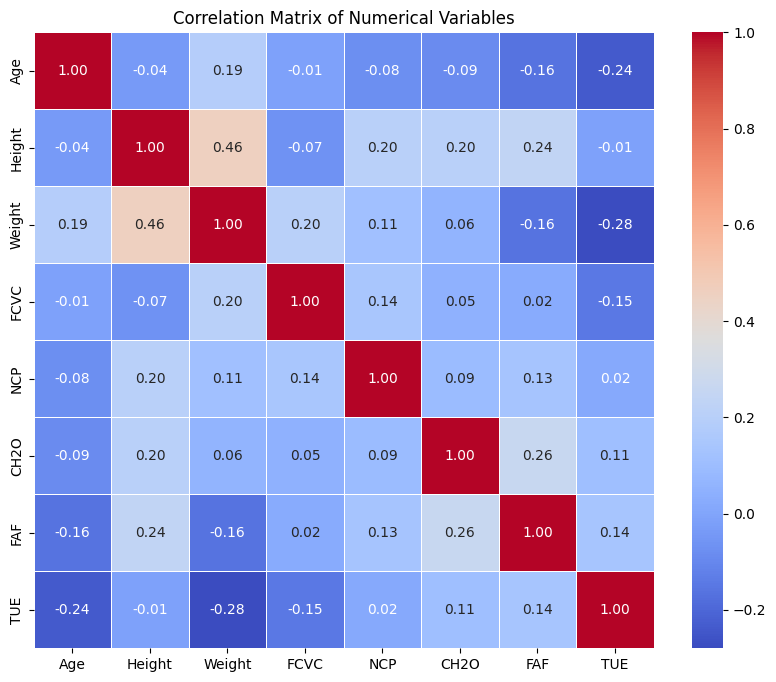

--- Strong Correlations (|r| > 0.5) ---
No strong correlations found.


In [31]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Identify strong correlations (absolute value > 0.5)
print("--- Strong Correlations (|r| > 0.5) ---")
strong_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.5:
            strong_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

if strong_pairs:
    for pair in strong_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")
else:
    print("No strong correlations found.")

**Observations from Correlation Matrix:**

1.  Absence of Strong Multicollinearity:
    * The most significant observation is that **no pair of numerical variables has a strong correlation** (absolute correlation coefficient $|r| > 0.5$).
    * The highest correlation found is between **Height** and **Weight** ($r = 0.46$), which is a natural biological relationship but still moderate.
    * **Implication for Modeling:** This is a positive sign for models like Logistic Regression. It indicates that our numerical independent variables provide distinct information and we do not suffer from severe **multicollinearity**, which could otherwise distort model coefficients.

2.  Weak Relationships with Lifestyle Factors:
    * Surprisingly, lifestyle numeric variables like `FAF` (Physical Activity) and `TUE` (Time using technology) show very weak linear correlations with `Weight` ($r = -0.16$ and $r = -0.28$ respectively).
    * This suggests that obesity levels might be more strongly driven by **categorical** factors (like `family_history` or `FAVC`) or non-linear combinations of features, rather than simple linear relationships with these numerical counts.

<h2 id="iv_2" style="font-weight: bold">2. Numerical Features vs. Target Variable (`NObeyesdad`)</h2>

In [32]:
# Grouped Summary Statistics
# We calculate Mean and Median to have a robust view of the central tendency
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("--- Mean Values by Obesity Level ---")
mean_stats = df.groupby('NObeyesdad')[numerical_cols].mean()
display(mean_stats.style.background_gradient(cmap='YlOrRd', axis=0).format("{:.2f}"))

print("\n--- Median Values by Obesity Level ---")
median_stats = df.groupby('NObeyesdad')[numerical_cols].median()
display(median_stats.style.background_gradient(cmap='YlOrRd', axis=0).format("{:.2f}"))

--- Mean Values by Obesity Level ---


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
NObeyesdad,,,,,,,,
Insufficient_Weight,19.42,1.69,50.01,2.16,2.70,1.57,1.00,0.58
Normal_Weight,21.76,1.68,62.16,2.34,2.75,1.86,1.25,0.68
Obesity_Type_I,25.50,1.69,92.87,1.98,2.23,1.79,0.71,0.44
Obesity_Type_II,27.75,1.77,115.31,1.92,2.52,1.59,0.52,0.23
Obesity_Type_III,23.05,1.69,120.94,3.00,3.00,1.66,0.36,0.04
Overweight_Level_I,23.18,1.69,74.48,2.01,2.36,1.73,0.74,0.37
Overweight_Level_II,26.64,1.70,82.09,2.04,2.22,1.72,0.65,0.40



--- Median Values by Obesity Level ---


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
NObeyesdad,,,,,,,,
Insufficient_Weight,19.00,1.70,50.00,2.00,3.00,2.00,1.00,1.00
Normal_Weight,21.00,1.66,61.00,2.00,3.00,2.00,1.00,1.00
Obesity_Type_I,22.00,1.68,90.74,2.00,3.00,2.00,0.00,0.00
Obesity_Type_II,27.00,1.77,117.79,2.00,3.00,2.00,0.00,0.00
Obesity_Type_III,25.00,1.67,112.05,3.00,3.00,2.00,0.00,0.00
Overweight_Level_I,21.00,1.70,75.00,2.00,3.00,2.00,0.00,0.00
Overweight_Level_II,24.00,1.70,82.00,2.00,2.00,2.00,0.00,0.00


**Observations from Grouped Statistics:**

Based on the aggregated mean and median values, we identify several distinct patterns differentiating the obesity levels:

**1. Weight & Age (Primary Differentiators):**
* **Weight Stratification:** As expected, there is a clear monotonic increase in `Weight` across categories. "Insufficient_Weight" averages around **50kg**, while "Obesity_Type_III" peaks at approximately **120kg**. This confirms Weight as the dominant feature for classification.
* **Age Trend:** The "Insufficient_Weight" group is notably younger (Mean Age $\approx$ 19.4), suggesting that underweight issues in this dataset are more prevalent among teenagers/young adults. Conversely, "Obesity_Type_II" has the highest average age ($\approx$ 27.8), indicating a potential correlation between age and weight gain.

**2. Lifestyle & Habits (Behavioral Insights):**
* **Physical Activity (FAF):** There is a noticeable inverse relationship. Individuals with "Normal_Weight" have the highest physical activity levels (Mean FAF $\approx$ 1.25). In sharp contrast, "Obesity_Type_III" individuals report extremely low activity (Mean FAF $\approx$ 0.36; Median = 0.0), highlighting sedentary behavior as a key risk factor.
* **Vegetable Consumption (FCVC) - Anomaly:** Surprisingly, the "Obesity_Type_III" group has the **highest** score for vegetable consumption (Mean $\approx$ 3.0). This is counter-intuitive and might indicate:
    * **Self-reporting bias:** Participants might over-report healthy habits.
    * **Dieting attempts:** Individuals with severe obesity might be currently on strict diets involving vegetables.

**3. Technology Usage (TUE):**
* The "Obesity_Type_III" group shows very low time spent on technology (Mean TUE $\approx$ 0.04), which contradicts the assumption that high screen time (sedentary behavior) always links to the highest obesity levels in this specific subgroup.

<h2 id="iv_3" style="font-weight: bold">3. Categorical vs. Categorical Analysis</h2>


==================== Analyzing: Gender vs NObeyesdad ====================

Frequency Table (Absolute Counts):


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Gender,,,,,,,
Female,169,137,156,2,323,145,103
Male,98,145,195,295,1,131,187


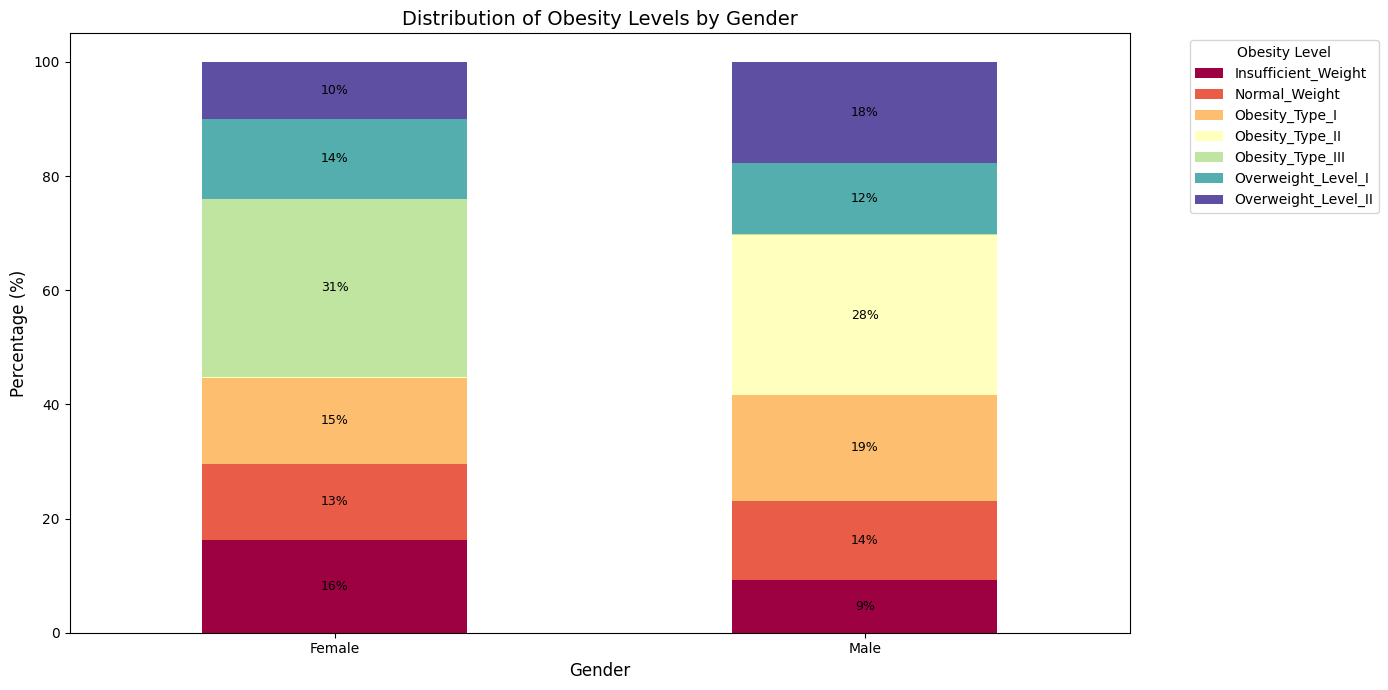


==================== Analyzing: family_history_with_overweight vs NObeyesdad ====================

Frequency Table (Absolute Counts):


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
family_history_with_overweight,,,,,,,
no,142,130,7,1,0,67,18
yes,125,152,344,296,324,209,272


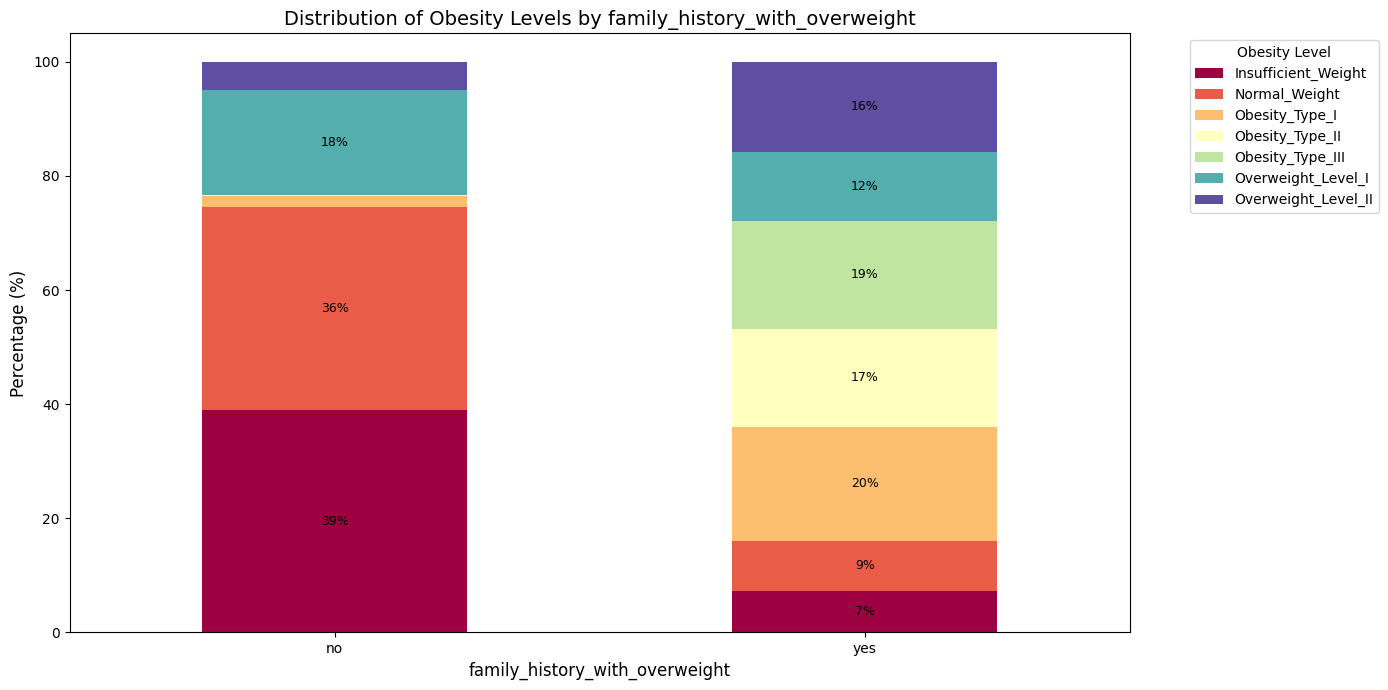


==================== Analyzing: FAVC vs NObeyesdad ====================

Frequency Table (Absolute Counts):


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
FAVC,,,,,,,
no,50,78,11,7,1,22,74
yes,217,204,340,290,323,254,216


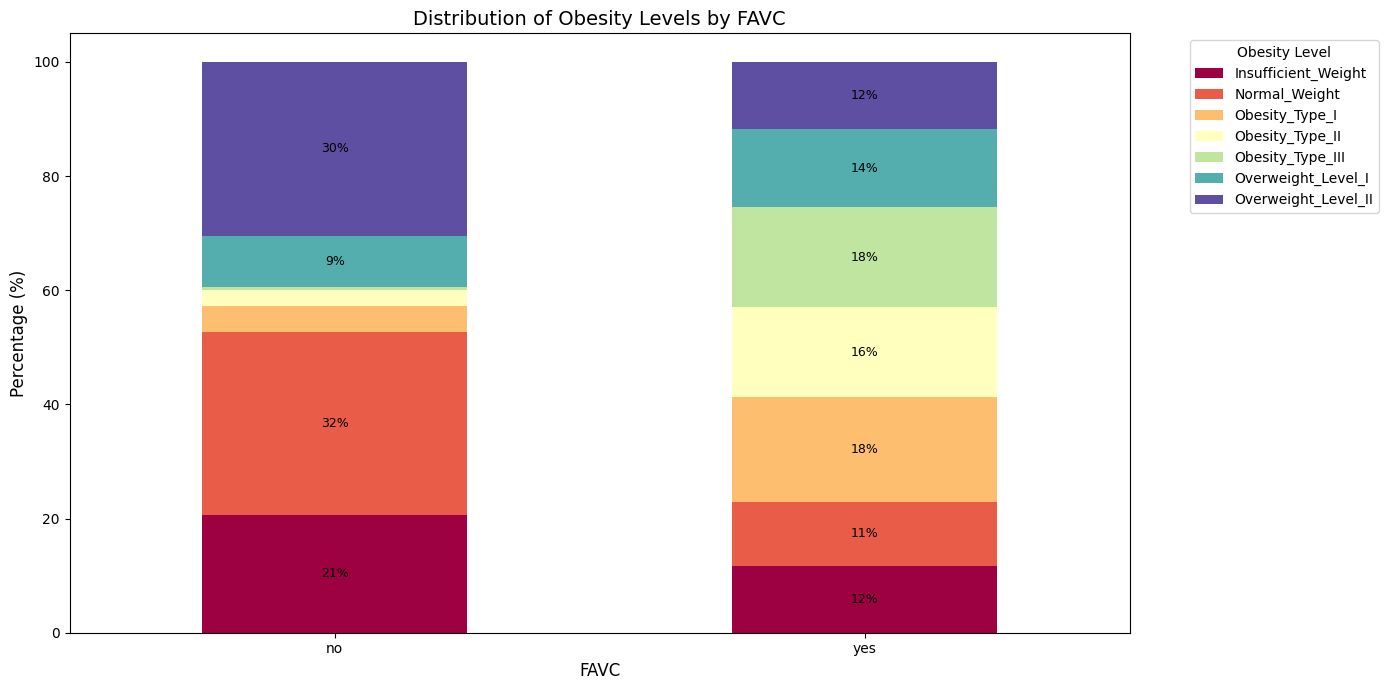


==================== Analyzing: CAEC vs NObeyesdad ====================

Frequency Table (Absolute Counts):


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CAEC,,,,,,,
Always,2,35,6,2,0,5,3
Frequently,117,81,6,1,1,14,16
Sometimes,145,156,338,293,323,236,270
no,3,10,1,1,0,21,1


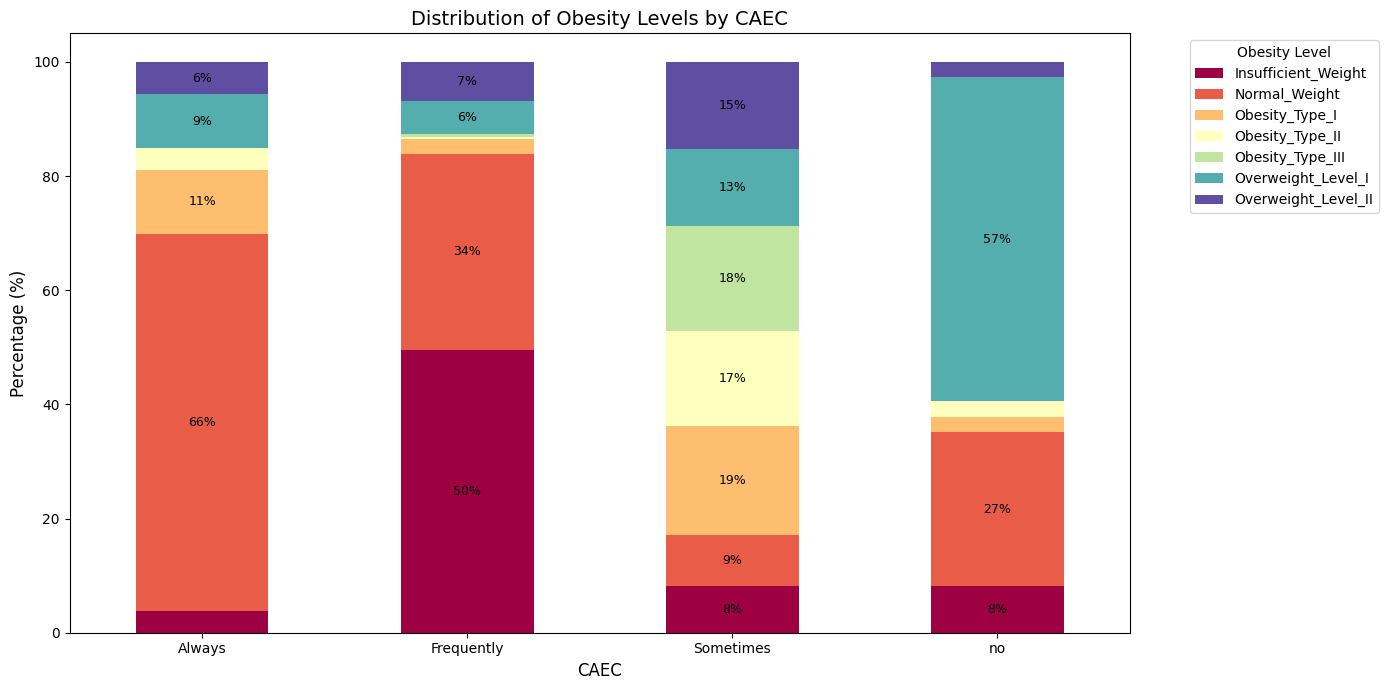


==================== Analyzing: SMOKE vs NObeyesdad ====================

Frequency Table (Absolute Counts):


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SMOKE,,,,,,,
no,266,269,345,282,323,273,285
yes,1,13,6,15,1,3,5


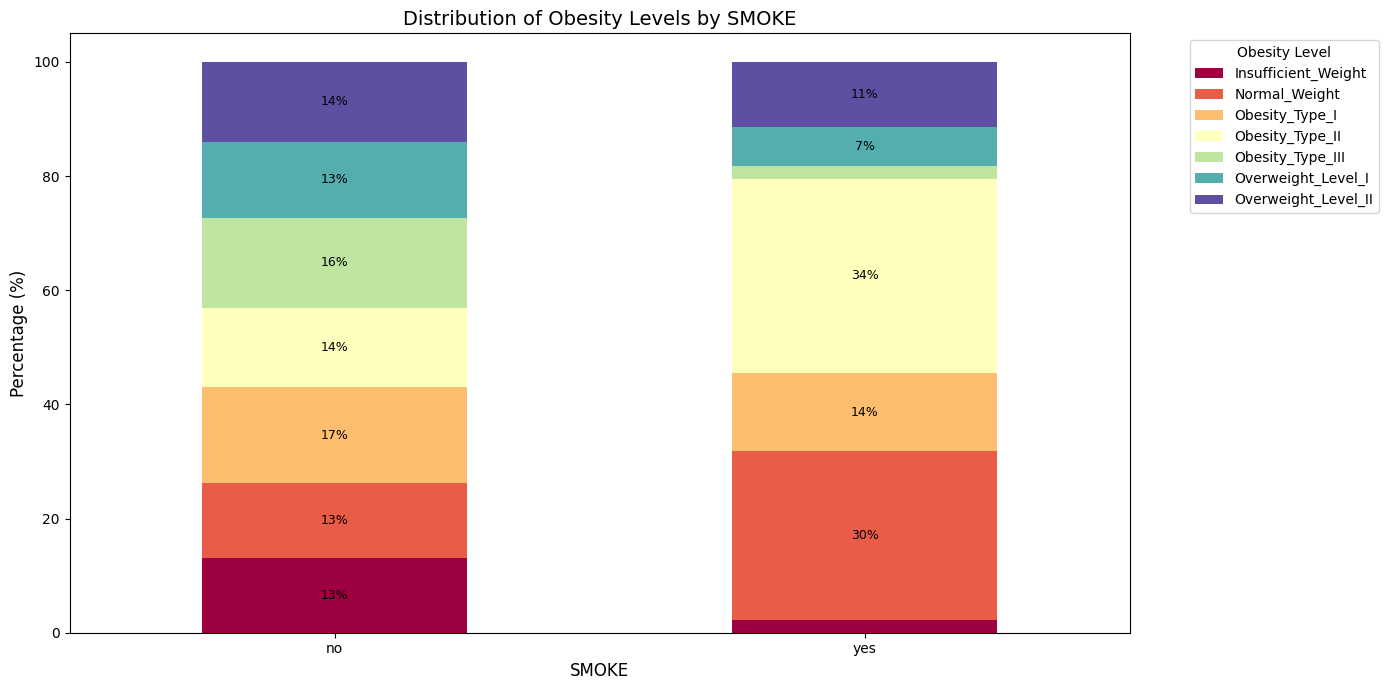


==================== Analyzing: SCC vs NObeyesdad ====================

Frequency Table (Absolute Counts):


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
SCC,,,,,,,
no,245,252,349,296,324,239,286
yes,22,30,2,1,0,37,4


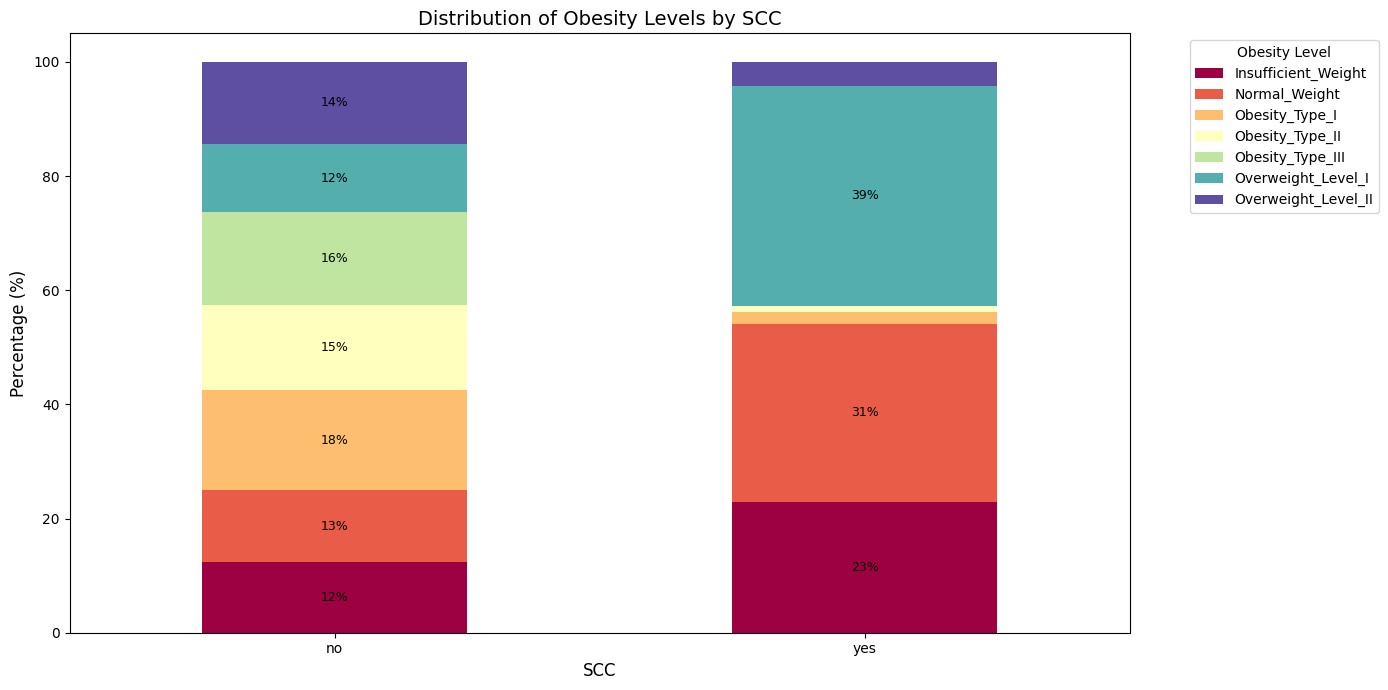


==================== Analyzing: CALC vs NObeyesdad ====================

Frequency Table (Absolute Counts):


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
CALC,,,,,,,
Always,0,1,0,0,0,0,0
Frequently,1,18,14,2,0,16,19
Sometimes,149,159,172,224,323,210,143
no,117,104,165,71,1,50,128


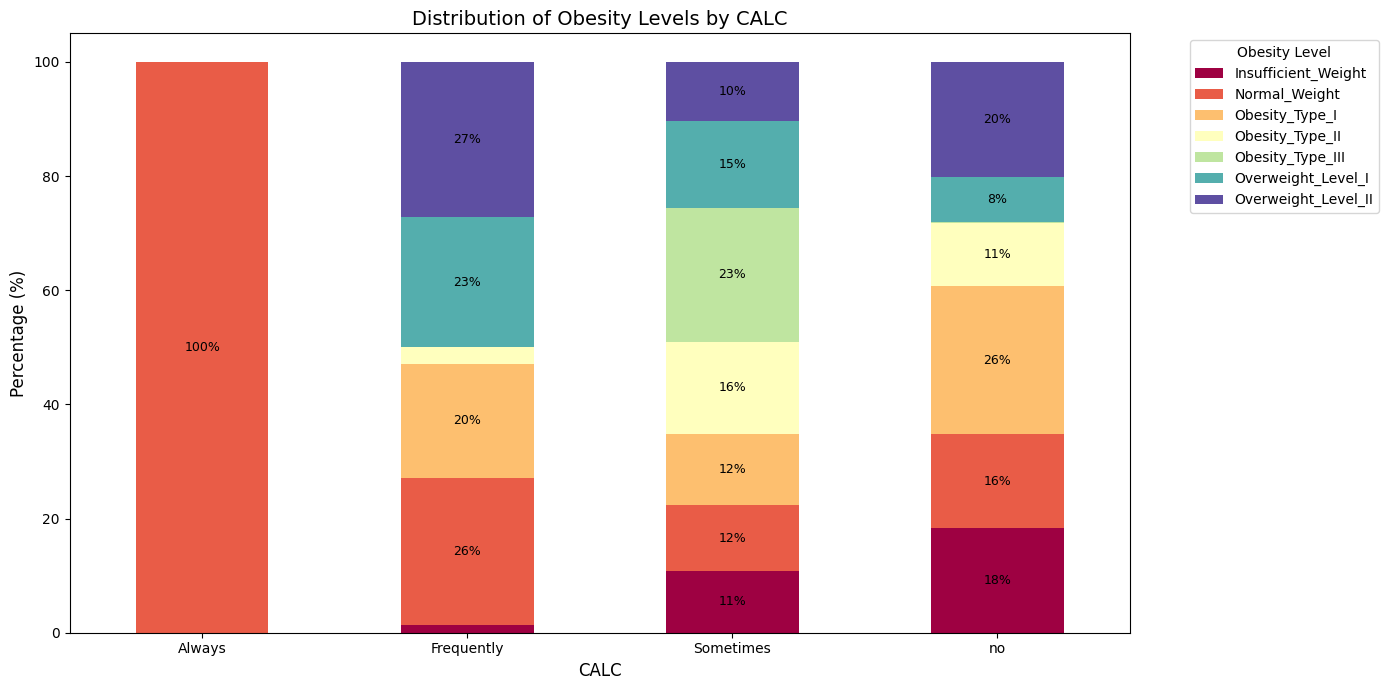


==================== Analyzing: MTRANS vs NObeyesdad ====================

Frequency Table (Absolute Counts):


NObeyesdad,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
MTRANS,,,,,,,
Automobile,46,44,110,95,1,66,94
Bike,0,4,0,1,0,2,0
Motorbike,0,6,3,0,0,1,1
Public_Transportation,215,197,236,200,323,198,189
Walking,6,31,2,1,0,9,6


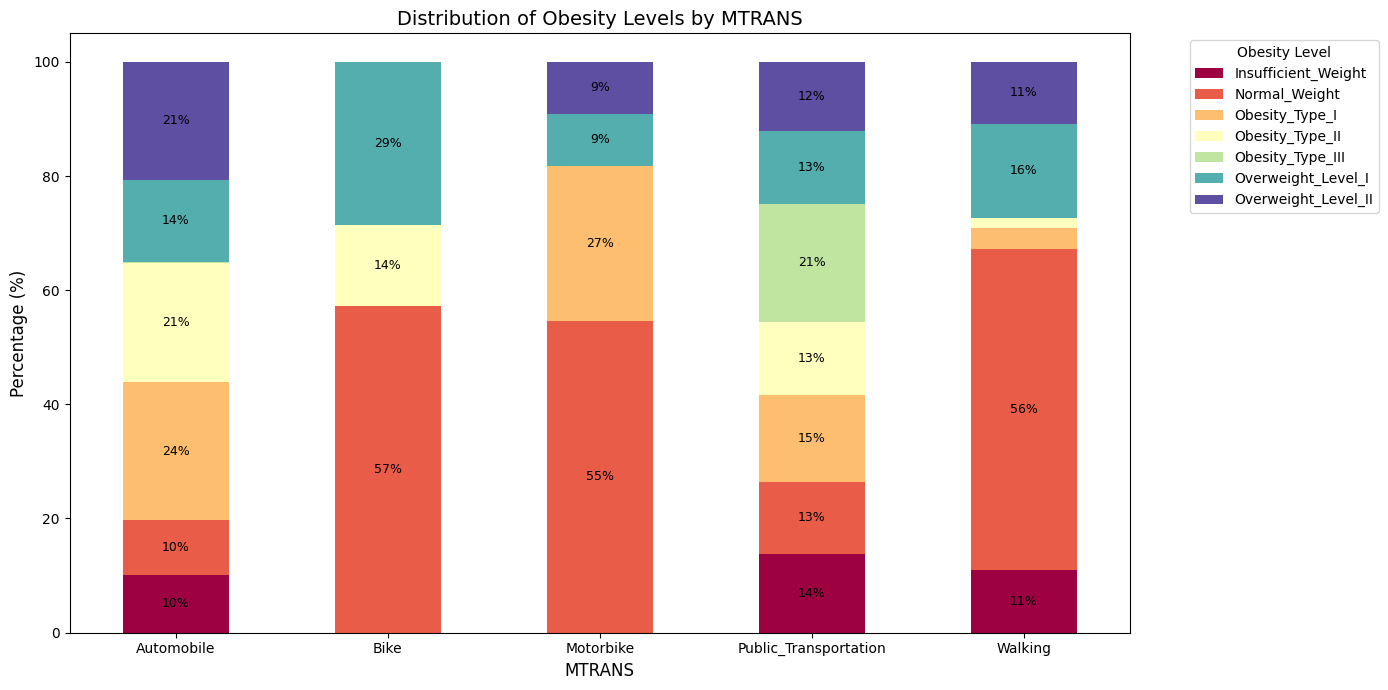

In [33]:
def analyze_cat_vs_target(df, col_name, target='NObeyesdad'):
    print(f"\n{'='*20} Analyzing: {col_name} vs {target} {'='*20}")
    
    # Frequency Table (Cross-tabulation)
    ct = pd.crosstab(df[col_name], df[target])
    print("\nFrequency Table (Absolute Counts):")
    display(ct)
    
    # Normalized Table (Percentages within each category)
    # Normalize by index (row) to see the distribution of obesity levels within each category
    ct_norm = pd.crosstab(df[col_name], df[target], normalize='index') * 100
    
    # Stacked Bar Plot
    ax = ct_norm.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Spectral')
    plt.title(f'Distribution of Obesity Levels by {col_name}', fontsize=14)
    plt.xlabel(col_name, fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    
    # Add percentage labels
    for c in ax.containers:
        # Only label segments with significant height (>5%) to avoid clutter
        labels = [f'{v.get_height():.0f}%' if v.get_height() > 5 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=9)
        
    plt.tight_layout()
    plt.show()

cat_cols_to_analyze = [col for col in df.select_dtypes(include=['object']).columns if col != 'NObeyesdad']

for col in cat_cols_to_analyze:
    analyze_cat_vs_target(df, col)

**Observations from Categorical Analysis:**

Based on the cross-tabulations and stacked bar charts, we have identified clear behavioral patterns distinguishing obesity levels:

**1. Family History (`family_history_with_overweight`):**
* **The Strongest Predictor:** This feature shows the most distinct separation between classes.
    * Individuals with **"yes"** (family history) account for the vast majority of **Obesity Type I, II, and III**.
    * In contrast, the **"no"** group consists almost entirely of **Normal_Weight** (36%) and **Insufficient_Weight** (39%).
* **Insight:** This reinforces that genetic predisposition or shared household environments are the dominant factors in this dataset.

**2. Transportation (`MTRANS`):**
* **Sedentary vs. Active:** There is a direct correlation between physical effort in transportation and weight.
    * **"Automobile"** and **"Public_Transportation"** users contain nearly all cases of **Obesity Type III**.
    * **"Walking"** users are predominantly **Normal_Weight** (56%) or **Insufficient_Weight** (11%), with almost zero instances of high-level obesity.

**3. Eating Habits (`FAVC` & `CAEC`):**
* **High Caloric Food (`FAVC`):** Users who consume high-caloric food ("yes") have a much more even spread across obesity levels, whereas those who do not ("no") are significantly more likely to be **Normal_Weight** (32%) or **Insufficient_Weight** (21%).
* **Snacking (`CAEC`) - Anomaly Detected:**
    * "Sometimes" snacking is the most common behavior for Obese individuals.
    * **Surprising Insight:** Individuals who snack **"Frequently"** are actually dominated by **Insufficient_Weight** (50%). This might imply that these individuals have fast metabolisms or are snacking specifically to try and gain weight.

**4. Calorie Monitoring (`SCC`):**
* Although a rare habit (very few "yes" responses), the impact is clear. Users who monitor their calories ("yes") are mostly **Normal_Weight** (31%) or **Overweight_Level_I** (39%), with very few cases of severe obesity.

**5. Gender Differences:**
* **Females** have a higher representation in **Insufficient_Weight** (16%) and **Obesity_Type_III** (31%) compared to males.
* **Males** appear more frequently in **Obesity_Type_II** (28%) and **Overweight_Level_II** (18%).

---

<h1 id="v" style="font-weight: bold">V. Initial Observations & Insights</h1>

<h2 id="v_1" style="font-weight: bold">1. Key Observations</h2>

* **Family History is the Strongest Predictor:** Genetic predisposition appears to be the most dominant factor. Individuals with a family history of overweight constitute the vast majority of all obesity classes (Type I, II, III), while those without it are almost exclusively in the "Normal" or "Insufficient Weight" categories.
  * **The "Vegetable" Anomaly (Maybe there is self-reporting bias):** A counter-intuitive finding is that the most obese group (`Obesity_Type_III`) reports the **highest** consumption of vegetables (`FCVC`). This strongly suggests **social desirability bias** (participants over-reporting healthy habits) or indicates that these individuals are currently on strict diets to lose weight.
  * **Transportation & Activity Correlation:** There is a clear divide based on lifestyle. "Walkers" are predominantly normal weight, while users of "Automobiles" make up nearly all severe obesity cases. Similarly, physical activity (`FAF`) is inversely related to weight, with `Obesity_Type_III` individuals reporting near-zero activity.
  * **The "Snacking" Paradox:** Frequent snacking (`CAEC`) is most common among the **Insufficient Weight** group. This suggests that for this specific demographic (often younger individuals), snacking might be a strategy to gain weight or indicates a faster metabolism, rather than a cause of obesity.
  * **Weight-Age Stratification:** The dataset shows a demographic split where "Insufficient Weight" individuals are significantly younger (teenagers/young adults), while "Obesity\_Type\_II" has the highest average age, implying weight accumulation over time.

<h2 id="v_2" style="font-weight: bold">2. Data Quality Issues Identified</h2>

  * **Duplicate Records:** The analysis identified and removed **24 duplicate rows** (dropping the count from 2111 to 2087).
  * **Feature Completeness:** The dataset is technically clean regarding missing values, with **0 null values** found across all columns.
  * **Imbalanced Classes:** Several categorical features (like `family_history_with_overweight`, `FAVC`, `SMOKE`, `SCC`) are highly imbalanced, with one category dominating the responses.

<h2 id="v_3" style="font-weight: bold">3. Necessary Preprocessing Steps</h2>

* **Handling Class Imbalance:** Since features like `SCC` (Calorie Monitoring) and `SMOKE` have very few "Yes" responses, we may need to use resampling techniques or class weighting to prevent the model from overfitting to the majority class.

* **Data Type Conversion:** Several columns that represent ordinal categories or counts (like `FCVC`, `NCP`, `CH2O`, `FAF`, TU`E) were initially stored as floats. Converting these to integers makes the data more interpretable and compatible with algorithms expecting discrete inputs.

<h2 id="v_4" style="font-weight: bold">4. Interesting Patterns for Research</h2>

* **The "Vegetable" Anomaly:** The most obese group (`Obesity_Type_III`) reports the highest consumption of vegetables (`FCVC`). This strongly suggests either social desirability bias (people over-reporting healthy habits) or reverse causality (obese individuals actively dieting). Investigating this could lead to research on the reliability of self-reported dietary data in obesity studies.

<h2 id="v_5" style="font-weight: bold">5. Serious Data Quality Concerns</h2>

  * **Reliability of Subjective Features (`FCVC`):** The data for "Vegetable Consumption" in the `Obesity_Type_III` class is highly suspicious. If a predictive model learns that "eating more vegetables leads to Type III Obesity," it will be **factually incorrect** and dangerous for prescriptive analytics. This "reverse causality" (eating veggies *because* of obesity, not leading to it) is a serious analytical concern.
  * **Rare Feature Classes:** The feature `SCC` (Calorie Monitoring) is heavily imbalanced, with very few "Yes" responses. While it correlates with normal weight, the sample size for "Yes" might be too small for a machine learning model to learn a robust general rule without overfitting.

<h2 id="v_6" style="font-weight: bold">6. Limitations Affecting Analysis</h2>

  * **Self-Reported Data Bias:** Since many features (diet, activity, water intake) are likely self-reported via surveys, they are subject to human error and honesty issues (as seen in the vegetable anomaly).
  * **Confounding Variables (Dieting vs. Lifestyle):** The dataset captures a "snapshot" in time. It cannot distinguish between someone who *always* eats healthy vs. someone who *just started* eating healthy to treat obesity. This limits the ability to infer **causality** for long-term prevention.
  * **Demographic Skew:** The strong link between "Younger Age" and "Underweight" might bias the model to associate youth with thinness, which may not hold true in older populations or different geographic regions.

In [36]:
df.to_csv(r'..\..\data\processed\ObesityDataSet_Cleaned.csv', index=False)